In [1]:
# import required packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Data Aggregation



In [2]:
# read in datasets as dataframes
energy_data = pd.read_csv(r'/content/london_energy.csv')
weather_data = pd.read_csv(r'/content/london_weather.csv')

# this function converts the date in yyyy-mm-dd to yyyymmdd format
# required for merging the dataframes
def convert_date(row):
    date = row['Date'][0:4] + row['Date'][5:7] + row['Date'][8:]
    return date

# apply the convert function to each row of the energy data df
# print the head of each df
energy_data['date'] = energy_data.apply(convert_date, axis = 1)
print(energy_data.head())
print(weather_data.head())
print(energy_data.shape)

       LCLid        Date     KWH      date
0  MAC000002  2012-10-12   7.098  20121012
1  MAC000002  2012-10-13  11.087  20121013
2  MAC000002  2012-10-14  13.223  20121014
3  MAC000002  2012-10-15  10.257  20121015
4  MAC000002  2012-10-16   9.769  20121016
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0

In [3]:
# change the type of the columns so that they match for merging
# merge the data frames based on the 'date' column
# print and export it as a csv so that these cells do not need to be ran each time
weather_data['date'] = weather_data['date'].astype(str)
energy_data['date'] = energy_data['date'].astype(str)
merged_data = pd.merge(energy_data, weather_data, how='left', left_on='date', right_on='date')
print(merged_data)

merged_data.to_csv(r'london_weather_energy_data.csv')

             LCLid        Date     KWH      date  cloud_cover  sunshine  \
0        MAC000002  2012-10-12   7.098  20121012          5.0       6.4   
1        MAC000002  2012-10-13  11.087  20121013          4.0       4.1   
2        MAC000002  2012-10-14  13.223  20121014          1.0       7.7   
3        MAC000002  2012-10-15  10.257  20121015          6.0       0.6   
4        MAC000002  2012-10-16   9.769  20121016          4.0       7.3   
...            ...         ...     ...       ...          ...       ...   
3510428  MAC005567  2014-02-24   4.107  20140224          4.0       4.4   
3510429  MAC005567  2014-02-25   5.762  20140225          5.0       2.0   
3510430  MAC005567  2014-02-26   5.066  20140226          1.0       7.7   
3510431  MAC005567  2014-02-27   3.217  20140227          4.0       4.9   
3510432  MAC005567  2014-02-28   0.366  20140228          7.0       1.0   

         global_radiation  max_temp  mean_temp  min_temp  precipitation  \
0                   106.

In [4]:
# cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth

columns = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

In [5]:
avg_data = pd.read_csv(r'london_weather_energy_data.csv')

# LCLid,Date,KWH,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
avg_data = avg_data[['Date', 'KWH', 'cloud_cover', 'sunshine', 'global_radiation', 'mean_temp', 'precipitation', 'pressure', 'snow_depth']]

# group by the date column and apply the mean function to the column to get the avg
# condition/energy consumption for each unique date in the set
# output for download
avg_data = avg_data.groupby('Date').mean().reset_index()
print(avg_data.head())
print(avg_data.shape)
avg_data.to_csv(r'london_energy_weather_avg.csv', index = False)

         Date        KWH  cloud_cover  sunshine  global_radiation  mean_temp  \
0  2011-11-23   6.952692          7.0       2.0              35.0        6.8   
1  2011-11-24   8.536480          3.0       2.0              35.0        8.6   
2  2011-11-25   9.499781          3.0       5.0              52.0       11.0   
3  2011-11-26  10.267707          4.0       0.7              24.0       10.2   
4  2011-11-27  10.850805          3.0       5.9              55.0       11.8   

   precipitation  pressure  snow_depth  
0            0.2  102720.0         0.0  
1            0.2  102710.0         0.0  
2            0.0  102450.0         0.0  
3            0.0  102580.0         0.0  
4            0.0  102130.0         0.0  
(829, 9)


# Exploratory Data Analysis


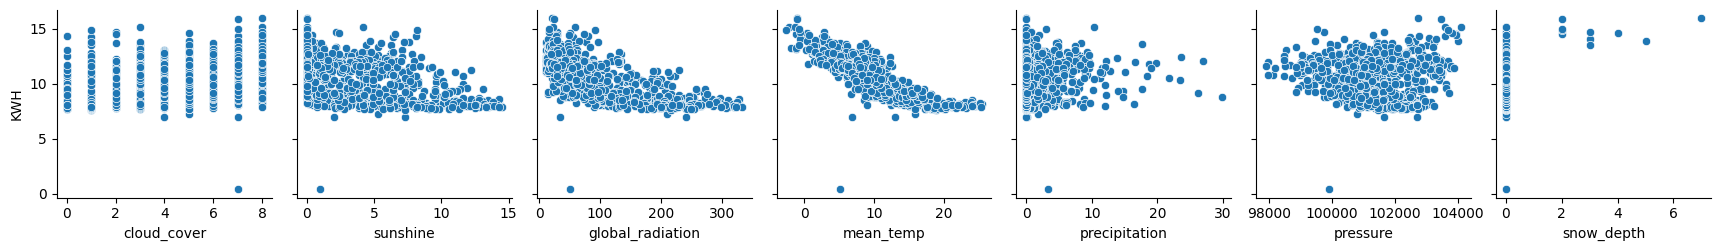

In [6]:
# using seaborn because they have a built in pretty pairplot type of function
import seaborn as sns

# read in the average data
# passing the dataframe to the pairplot, x_vars are the "columns" of the df that are the features
# while y_vars is equal to KWH since that is our target
data = pd.read_csv(r'london_energy_weather_avg.csv')
sns.pairplot(data, x_vars=['cloud_cover', 'sunshine', 'global_radiation', 'mean_temp', 'precipitation', 'pressure', 'snow_depth'], y_vars=['KWH'])

# Neural Network


In [9]:
# function that creates our model
def createModel():
  model = tf.keras.models.Sequential()

  # two dense layers, input shape for the 7 features
  model.add(Dense(128, activation="relu", input_shape=(7,)))
  model.add(Dense(64, activation="relu"))

  # dropout layer for regularization
  model.add(Dropout(0.2))

  # addtional hidden layers to try to increase performance
  model.add(Dense(32, activation="relu"))
  model.add(Dense(16, activation="relu"))

  # another dropout for regularization
  model.add(Dropout(0.2))

  model.add(Dense(8, activation="relu"))
  # output layer, 1 neuron for a regression problem
  model.add(Dense(1, activation='linear'))

  # compile with MSE as the loss
  # adam and mae as a metric
  model.compile(
      optimizer = "adam",
      loss = "mean_squared_error",
      metrics = ['mse']
  )
  return model

#call the function and print the summary!
model = createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 1

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# read in data from the avg output file
# doing so, previous cells do not need to be reran for each run
avg_data = pd.read_csv(r'london_energy_weather_avg.csv')

# add 273 to the mean temperature to convert to kelvin from celsius
# allows for an absolute zero, with no negatives for consistent normalization
# across all features
avg_data['mean_temp'] = avg_data['mean_temp'] + 273.0

# create this list for future use
columns = ['cloud_cover', 'sunshine', 'global_radiation', 'mean_temp', 'precipitation', 'pressure', 'snow_depth']

# create the scalar object using sklearn's MinMaxScaler function
scalar = MinMaxScaler()

# normalize the x data (the columns indicated in the var above)
x_norm = scalar.fit_transform(avg_data[columns])

# get the y values/KWH/Energy consumption
y = avg_data['KWH'].values

# a sort of boolean indexing making sure that null values are removed from
# the input
# normalize the y by doing the same boolean indexing
# divide by the max
y = y[~np.isnan(x_norm).any(axis=1)]
x_norm = x_norm[~np.isnan(x_norm).any(axis=1)]

y_norm = y/np.max(y)

print(x_norm)
print(y_norm[:10])
print(x_norm.shape)
print(y.shape)

[[0.875      0.13793103 0.07165109 ... 0.00671141 0.77491961 0.        ]
 [0.375      0.13793103 0.07165109 ... 0.00671141 0.7733119  0.        ]
 [0.375      0.34482759 0.12461059 ... 0.         0.73151125 0.        ]
 ...
 [0.125      0.53103448 0.30841121 ... 0.09395973 0.54180064 0.        ]
 [0.5        0.33793103 0.24299065 ... 0.16107383 0.45016077 0.        ]
 [0.875      0.06896552 0.11838006 ... 0.11409396 0.31993569 0.        ]]
[0.43617242 0.53553027 0.59596232 0.64413764 0.68071786 0.57109447
 0.58185285 0.55290975 0.57889389 0.63649676]
(828, 7)
(828,)


In [24]:
# utilizing sklearns train test split passing in the x_norm and y_norm values
# get our sets to train/predict on. Random state ensures reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state = 42, shuffle = True)

# create model, print summary, and train with 100 epochs 80/20 train/val
model = createModel()
model.summary()
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=16)
print(x_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1024      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 8)                

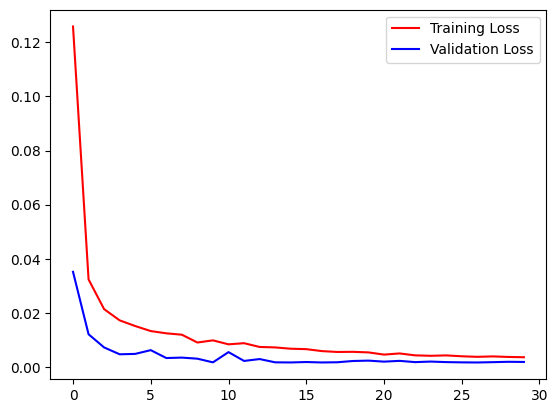

In [25]:
plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


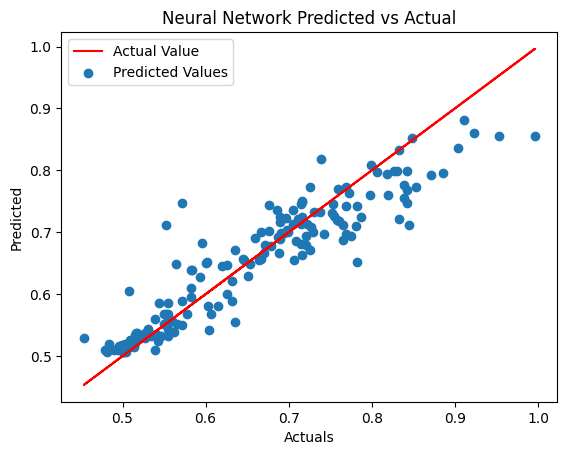

In [26]:
# predict on the test data and get the result as a var
result = model.predict(x_test)

# plot the actuals as a line
plt.plot(y_test, y_test, c = 'red', label = 'Actual Value')

# plot the predicted as a scatter plot
plt.scatter(y_test, result, label = 'Predicted Values')

# add the labels
plt.xlabel('Actuals')
plt.ylabel('Predicted')

# title
plt.title("Neural Network Predicted vs Actual")

# show legend and plot
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Feature Sensitivity')

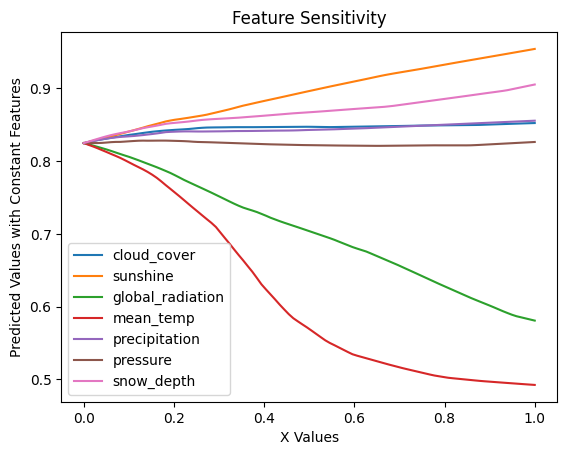

In [27]:
# we have seven features and using 100 as an arb. amt of rows
# labels will equal columns previously defined
features = 7
rows = 100
labels = columns

# iterate through the features
for i in range(features):
  # create empty matrix
  template_matrix = np.zeros((rows, features))

  # for the specific feature have it's values equal 0 to 1
  # to try to capture it's importance
  template_matrix[:, i] = np.linspace(0, 1, 100)

  # predict on that feature
  y_pred = model.predict(template_matrix)

  # plot it with the corresponding label
  plt.plot(np.linspace(0, 1, 100), y_pred, label = labels[i])
  plt.legend()

# add visualization stuff
plt.xlabel('X Values')
plt.ylabel('Predicted Values with Constant Features')
plt.title('Feature Sensitivity')

Mean Squared Error for the Linear Regression
0.0023541854405804575


Text(0.5, 0, 'Weather Conditions')

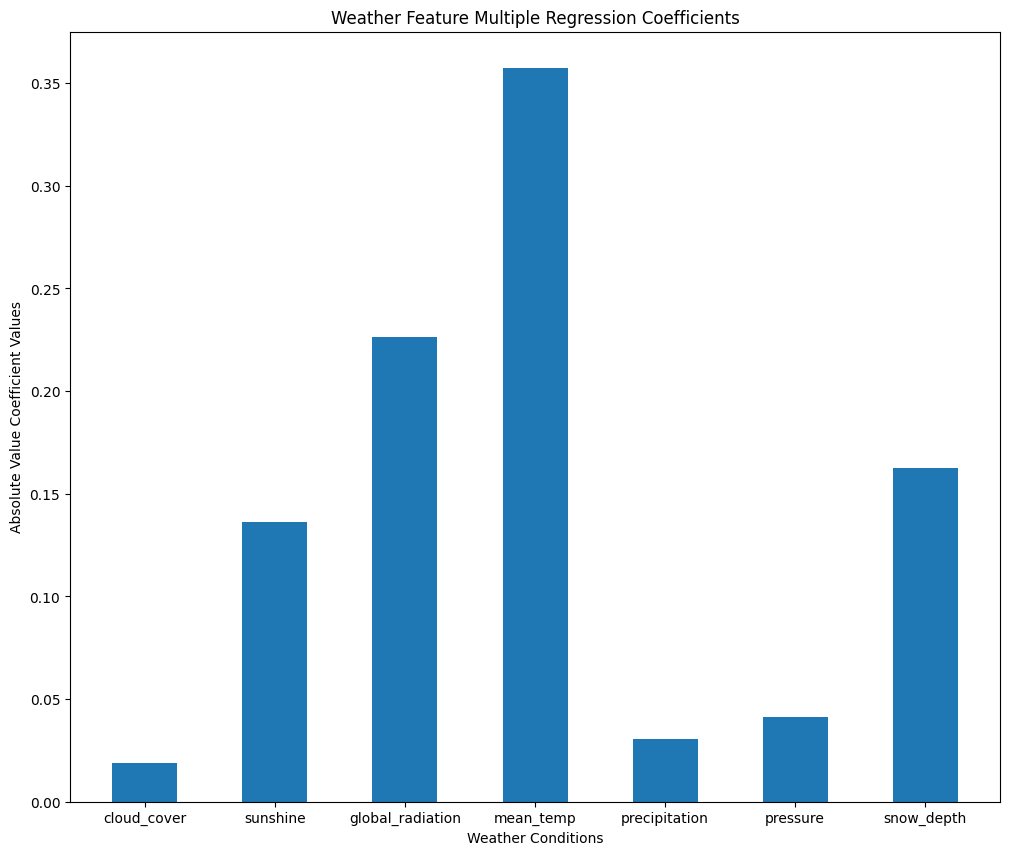

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# from the imported functions above
# create the linear regression model
# use the previous x/y train from the split earlier
model = LinearRegression()
model.fit(x_train, y_train)

# get the y predicted by passing x_test
# calculate the MSE and print
y_predicted = model.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
print('Mean Squared Error for the Linear Regression')
print(mse)

# get the coefficients and take the coeff cause
# not worried about direction more so the strength
coeffs = abs(model.coef_)

# plot as a bar graph to see each of them in comparison
plt.figure(figsize=(12,10))
plt.bar(labels, coeffs, width = 0.5)
plt.title('Weather Feature Multiple Regression Coefficients')
plt.ylabel('Absolute Value Coefficient Values')
plt.xlabel('Weather Conditions')

